In [8]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

pp File: ../InputData/pT_Rebin_1_pDevNONE/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_1_pDevNONE/pPb_SE_L0_Correlation_GMB_Ratio.root


**root to numpy**

In [2]:
Corrs = ROOT_to_nparray()
#Plot_UB()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [3]:
Correlated_Subtraction_Weights(Corrs)
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Pedestal Subtraction**

In [4]:
Ped_Sub_After_Cs(Corrs)
#Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

<Figure size 1728x864 with 0 Axes>

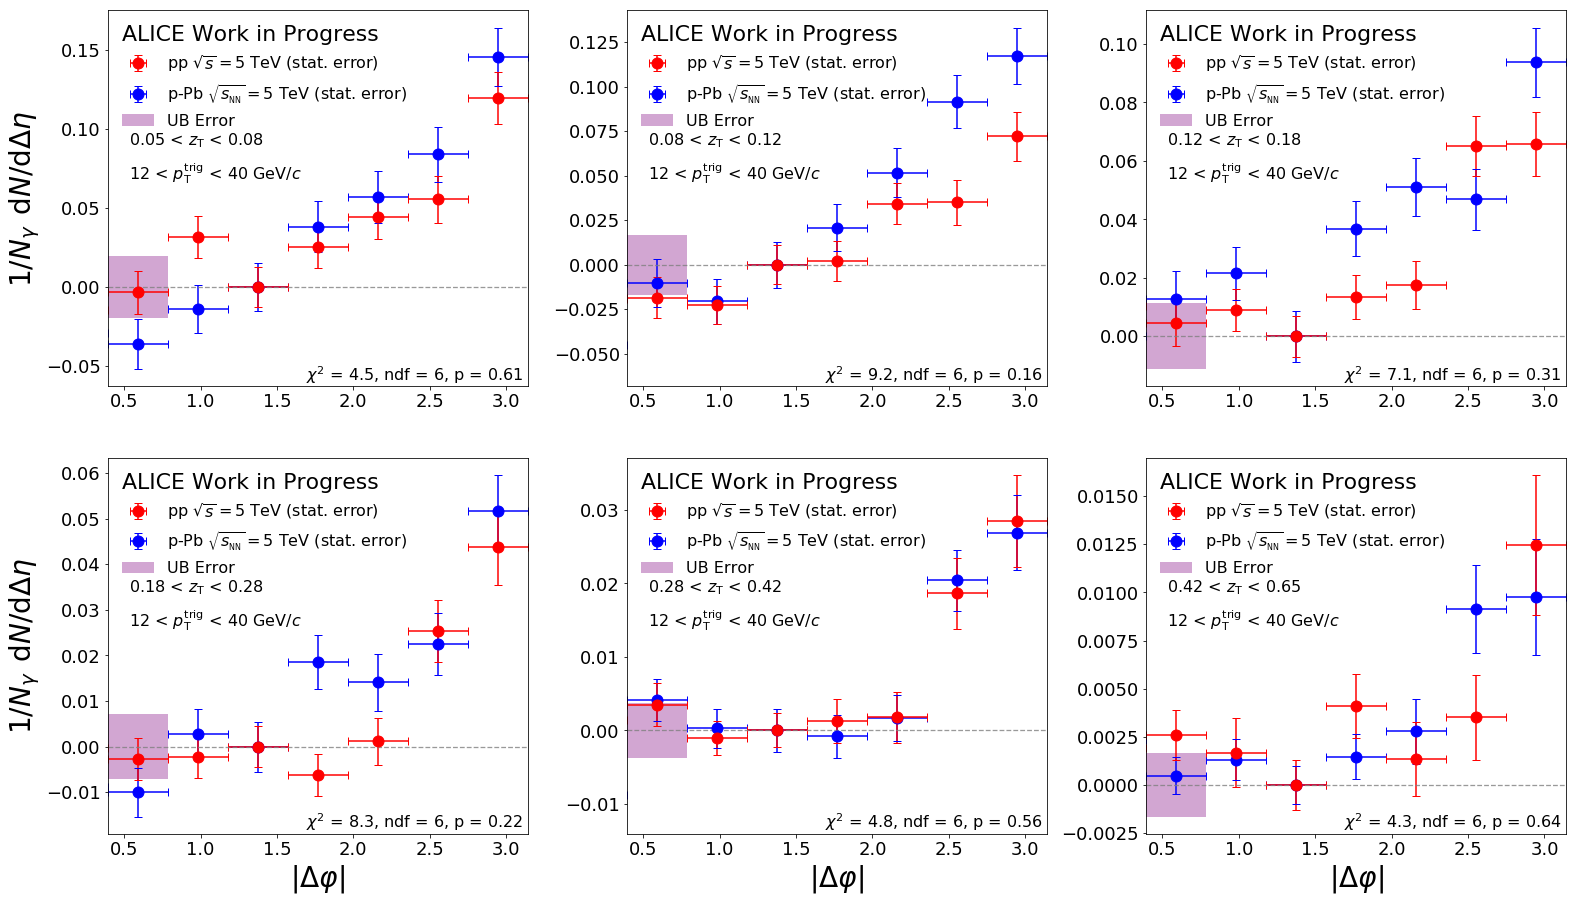

In [5]:
Avg_Corr = Cs_Weighted_Average(Corrs)
Plot_pp_pPb_Cs(Avg_Corr)

TESTING GET FF
[[ 8.21925078  3.44718497  2.35837024  0.72845753  0.33052268  0.07626868
   0.01142809]]
TESTING GET FF
[[ 10.70882314   6.35397523   3.04628458   0.91598439   0.33131725
    0.09547548   0.01207963]]


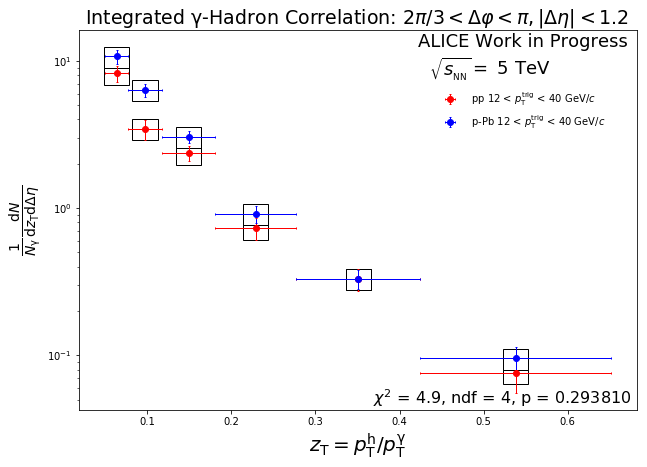

                    pp Central Values:
[ 8.21925078  3.44718497  2.35837024  0.72845753  0.33052268  0.07626868]

                    pp Stat. Uncertainty:
[ 0.98061054  0.53730515  0.27312271  0.12386781  0.05828916  0.02056432]

              pp Systematic Uncertainty:
[ 1.33315454  0.55913007  0.38252538  0.11815511  0.05361046  0.01237071]

                    p-Pb Central Values:
[ 10.70882314   6.35397523   3.04628458   0.91598439   0.33131725
   0.09547548]

                    p-Pb Stat. Uncertainty:
[ 1.13694021  0.62796657  0.29884173  0.12531049  0.0492305   0.01829097]

              p-Pb Systematic Uncertainty:
[ 1.73696077  1.03060865  0.49410442  0.14857178  0.05373934  0.01548603]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 12\%-59\% & 10\%-43\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
Tracking Efficiency &  5\% & 5\%  \\ 
TESTING GET FF
[[ 8.21925078  3.44718497  2.35837024  0.72845753  0.33052268  0.07626868
  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

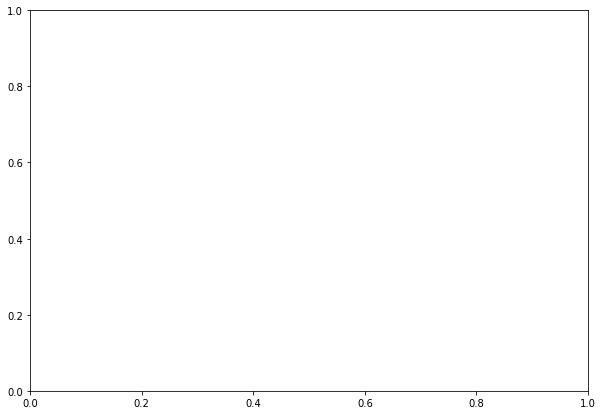

In [9]:
Frags = Get_Fragmentation(Corrs)
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF(Combined_Frags)

Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
print_from_Dict(Frags_Avg_Cs)
Plot_pp_pPb_Avg_FF(Frags_Avg_Cs)

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
FF_Ratio(Frags_Avg_Cs)

## Compare Different Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
FF_Ratio(Frags_Avg_Cs)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV"]
colors = ["darkorchid","blue","cyan","red"]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)